Analise de crimes cometidos em Toronto Canadá

by:Marcos Victor

indíce:
# 1. Importação de bibliotecas
# 2. Carregamento dos dados
# 3. limpeza e analise exploratoria
# 4. visualizações e gráficos

1. Importação de bibliotecas

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2. Carregamento dos dados

In [18]:

df=pd.read_excel("Pasta1.xlsx")
print(df)

       REPORT_DATE  REPORT_YEAR OCC_MONTH     OCC_DOW  \
0       2014-01-01         2014  December  Tuesday      
1       2014-01-01         2014   January  Wednesday    
2       2014-01-01         2014   January  Wednesday    
3       2014-01-01         2014   January  Wednesday    
4       2014-01-01         2014  December  Tuesday      
...            ...          ...       ...         ...   
420195  2024-12-31         2024  December  Tuesday      
420196  2024-12-31         2024  December  Monday       
420197  2024-12-31         2024  December  Tuesday      
420198  2024-12-31         2024  December  Tuesday      
420199  2024-12-31         2024  December  Tuesday      

                                            LOCATION_TYPE PREMISES_TYPE  \
0                        Apartment (Rooming House, Condo)     Apartment   
1                        Apartment (Rooming House, Condo)     Apartment   
2       Streets, Roads, Highways (Bicycle Path, Privat...       Outside   
3              

3. Limpeza e Análise Exploratoria

In [5]:
df["REPORT_DATE"].count()


np.int64(420200)

quantidade de reportes

420,200 REPORTS


_______________________
 por Local

In [7]:
df["PREMISES_TYPE"].value_counts()

PREMISES_TYPE
Outside        113826
Apartment       98358
Commercial      83010
House           76280
Other           25356
Transit         12901
Educational     10469
Name: count, dtype: int64

______________________________________________
Tipos de crimes


In [8]:
df["MCI_CATEGORY"].value_counts()

MCI_CATEGORY
Assault            223618
Break and Enter     77029
Auto Theft          68063
Robbery             37087
Theft Over          14403
Name: count, dtype: int64

________________________________________
Relação crimes por local

In [10]:
df.groupby(["PREMISES_TYPE","MCI_CATEGORY"]).size()

PREMISES_TYPE  MCI_CATEGORY   
Apartment      Assault            70394
               Auto Theft          1989
               Break and Enter    20358
               Robbery             3171
               Theft Over          2446
Commercial     Assault            34621
               Auto Theft          5842
               Break and Enter    27415
               Robbery            10217
               Theft Over          4915
Educational    Assault             7951
               Auto Theft            81
               Break and Enter     1287
               Robbery              991
               Theft Over           159
House          Assault            27472
               Auto Theft         21571
               Break and Enter    23721
               Robbery             1303
               Theft Over          2213
Other          Assault            16951
               Auto Theft          2109
               Break and Enter     4098
               Robbery             1397
         

____________________________________
frequencia de reporte anual


In [ ]:
df["REPORT_YEAR"].value_counts()

REPORT_YEAR
2023    49423
2024    47181
2022    41768
2019    40123
2018    37347
2020    35188
2021    35153
2017    35140
2016    33532
2015    32884
2014    32461
Name: count, dtype: int64

______________________________________________
relacao reportes mensais por ano


In [12]:
df.groupby(["REPORT_YEAR","OCC_MONTH"]).size()

REPORT_YEAR  OCC_MONTH
2014         April        2570
             August       2821
             December     2496
             February     2259
             January      2568
                          ... 
2024         March        3821
             May          4162
             November     3776
             October      3867
             September    3946
Length: 132, dtype: int64

__________________________________
Dias da semana com reports

In [ ]:
df["OCC_DOW"].value_counts()

OCC_DOW
Friday        63397
Saturday      61619
Sunday        59558
Thursday      59502
Wednesday     59170
Monday        58812
Tuesday       57998
Name: count, dtype: int64

________________________________
reports mensais total anual


In [14]:
df["OCC_MONTH"].value_counts()

OCC_MONTH
October      37087
August       36988
July         36933
May          36181
September    36138
June         36086
November     35915
December     34223
January      34190
March        33233
April        32900
February     30182
Name: count, dtype: int64

4. visualizações e gráficos

<function matplotlib.pyplot.show(close=None, block=None)>

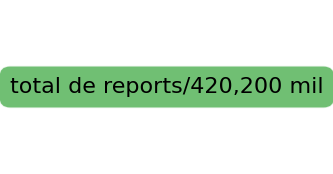

In [ ]:
fig, ax =plt.subplots(figsize=(4, 2))
ax.axis('off')
ax.text(0.5,0.5,'total de reports'
        '/420,200 mil',
        fontsize=16, ha='center', va='center',
        bbox=dict(facecolor='#4CAF50', alpha=0.8, boxstyle='round,pad=0.5',edgecolor='white'))
plt.show

crime por locais


PREMISES_TYPE
Outside        113826
Apartment       98358
Commercial      83010
House           76280
Other           25356
Transit         12901
Educational     10469
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

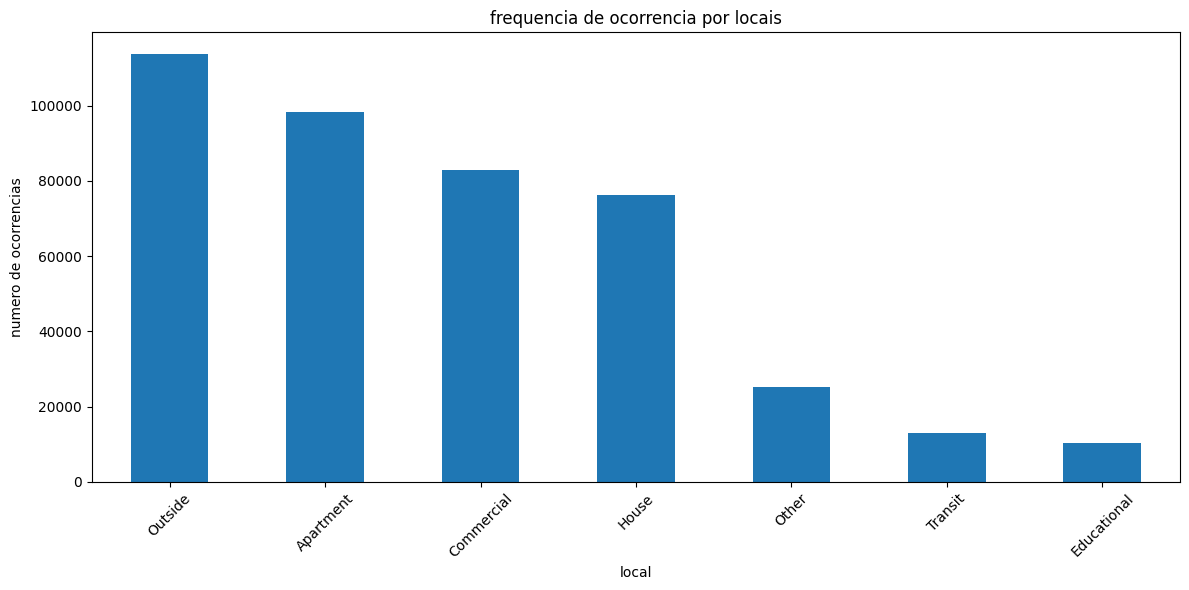

In [25]:
frequencia=df["PREMISES_TYPE"].value_counts()
print(frequencia)

frequencia.plot(kind="bar",figsize=(12,6))
plt.title("frequencia de ocorrencia por locais")
plt.xlabel("local")
plt.ylabel("numero de ocorrencias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

Categoria de crimes


MCI_CATEGORY
Assault            223618
Break and Enter     77029
Auto Theft          68063
Robbery             37087
Theft Over          14403
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

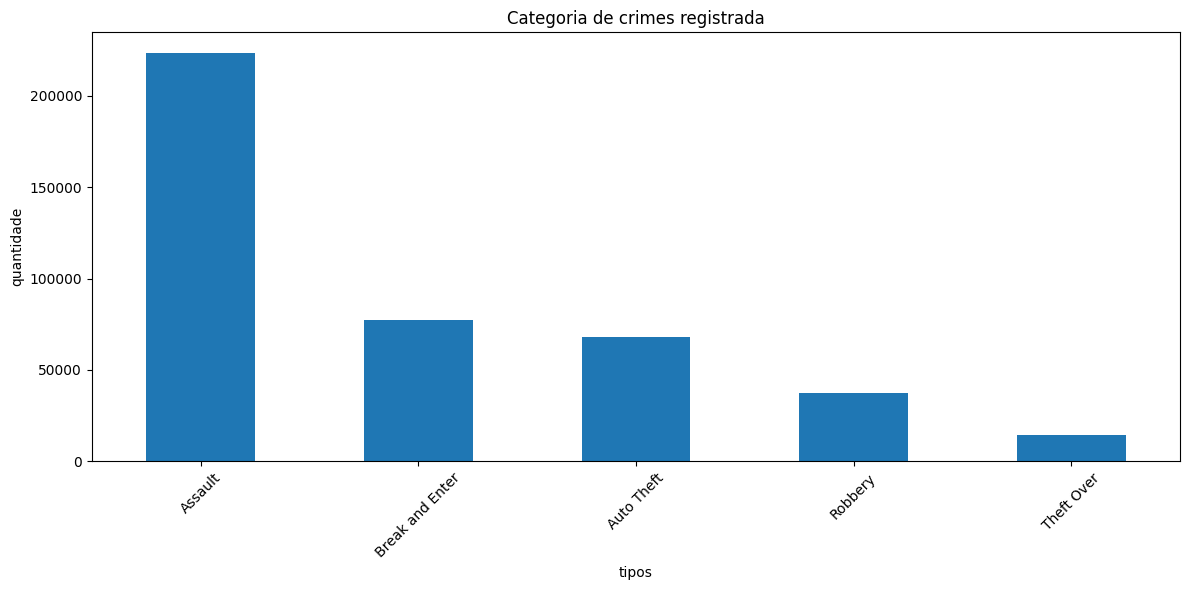

In [27]:
crimes=df["MCI_CATEGORY"].value_counts()
print(crimes)

crimes.plot(kind="bar",figsize=(12,6))
plt.title("Categoria de crimes registrada")
plt.xlabel("tipos")
plt.ylabel("quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show


Crimes por local

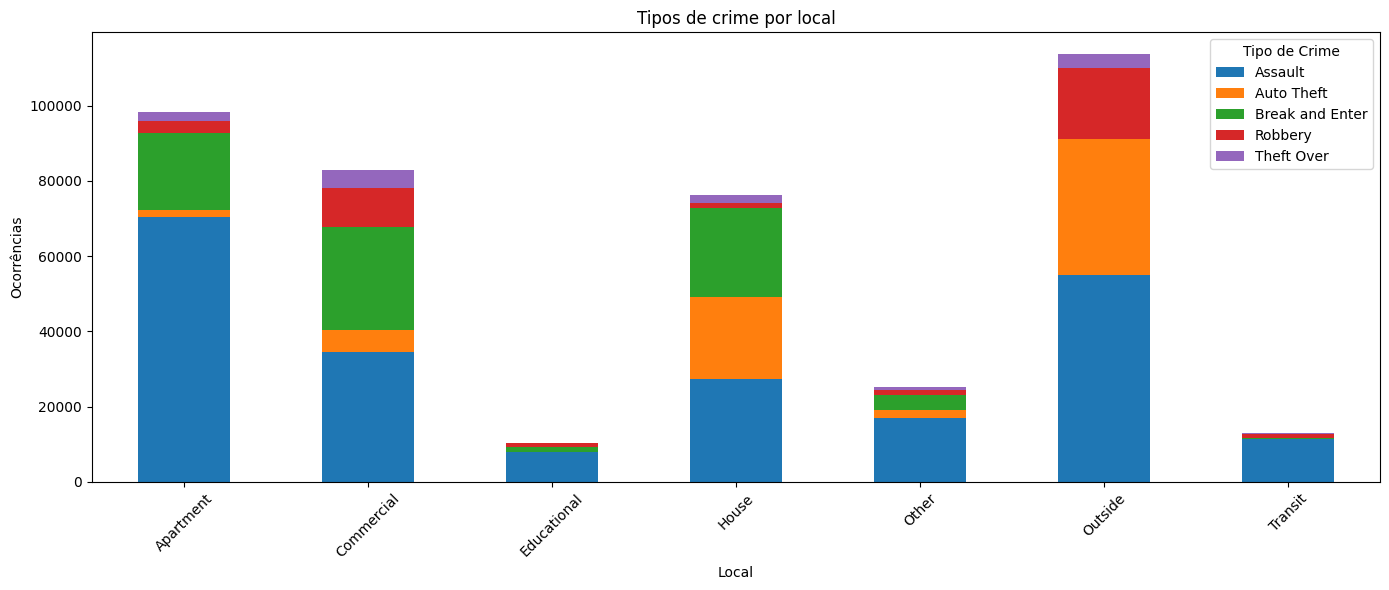

In [29]:
tabela = pd.crosstab(df["PREMISES_TYPE"], df["MCI_CATEGORY"])

# Gráfico de barras empilhadas
tabela.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("Tipos de crime por local")
plt.xlabel("Local")
plt.ylabel("Ocorrências")
plt.xticks(rotation=45)
plt.legend(title="Tipo de Crime")
plt.tight_layout()
plt.show()

Reporte anual

<function matplotlib.pyplot.show(close=None, block=None)>

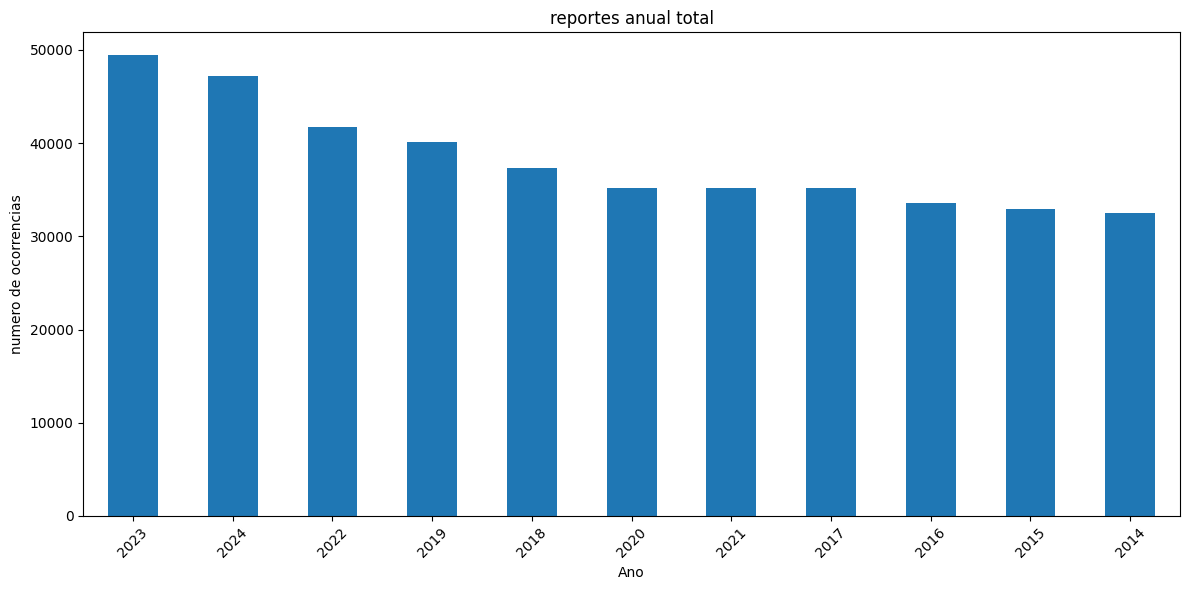

In [33]:
ano=df["REPORT_YEAR"].value_counts()

ano.plot(kind="bar",figsize=(12,6))
plt.title("reportes anual total")
plt.xlabel("Ano")
plt.ylabel("numero de ocorrencias")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show


reportes por mês

<function matplotlib.pyplot.show(close=None, block=None)>

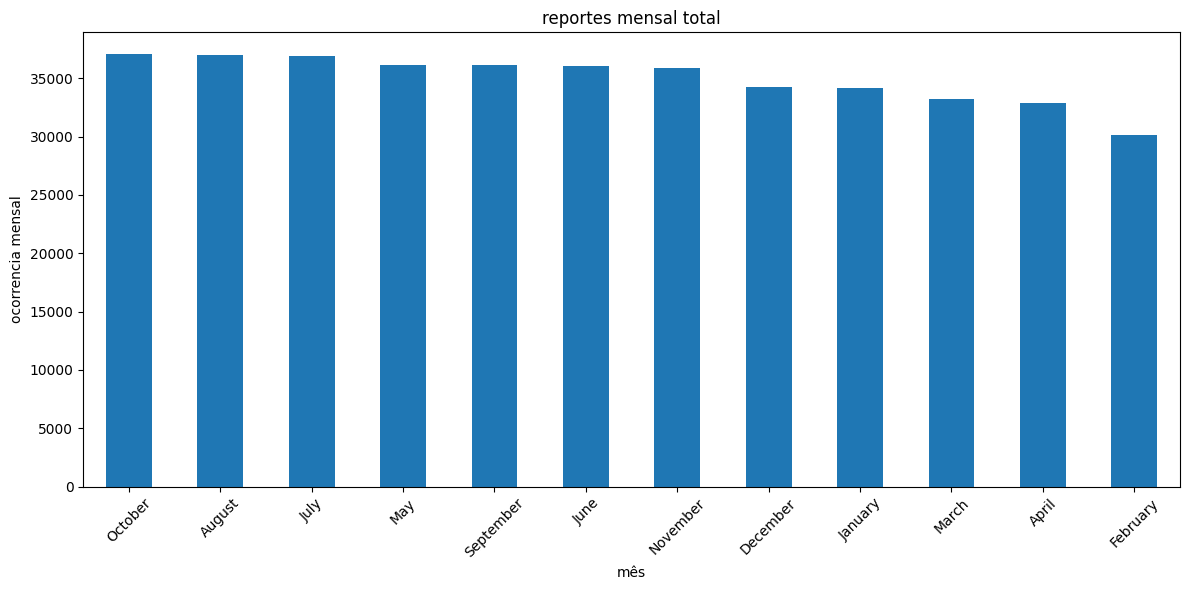

In [34]:
mensal=df["OCC_MONTH"].value_counts()
mensal

mensal.plot(kind="bar",figsize=(12,6))
plt.title("reportes mensal total")
plt.xlabel("mês")
plt.ylabel("ocorrencia mensal")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show

reports anuais por mês

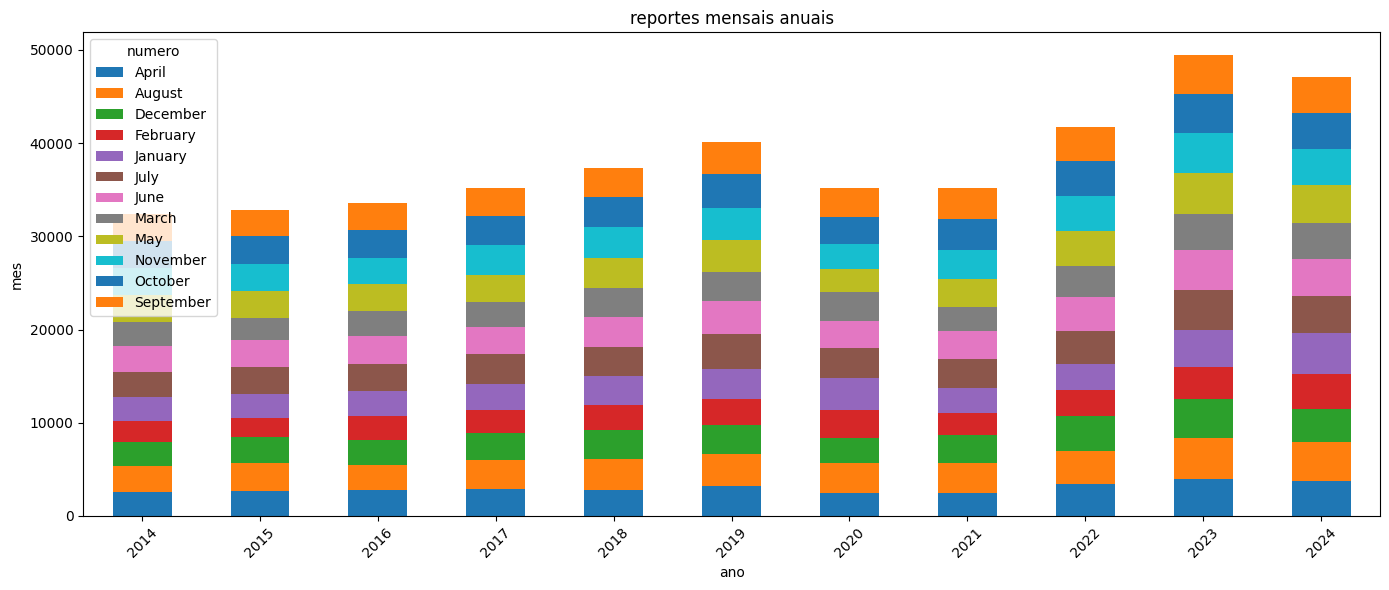

In [35]:
tabela = pd.crosstab(df["REPORT_YEAR"], df["OCC_MONTH"])

# Gráfico de barras empilhadas
tabela.plot(kind="bar", stacked=True, figsize=(14,6))
plt.title("reportes mensais anuais")
plt.xlabel("ano")
plt.ylabel("mes")
plt.xticks(rotation=45)
plt.legend(title="numero")
plt.tight_layout()
plt.show()
